# Libraries Import

In [1]:
import math
import re
import os


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [6]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score

In [7]:
import pickle

# Dataset Import

In [8]:
df=pd.read_csv(r'/content/cardio_train.csv',sep=';')

The dataset consists of 70 000 records of patients data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure, and etc. The target class "cardio" equals to 1, when patient has cardiovascular desease, and it's 0, if patient is healthy.

The task is to predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

#### Data description

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


In [9]:
#!pip install ydata-profiling


In [10]:
# from ydata_profiling import ProfileReport

# from ydata_profiling.utils.cache import cache_file

# report=ProfileReport(df, title="health data", explorative=True)
# report.to_file(r"C:\Users\first\Downloads\MLP\Data_results.html")
# report.to_notebook_iframe()

# Dataset Exploration

In [11]:
list(df.columns)

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [12]:
pd.concat([df.head(5), df.sample(5), df.tail(5)])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
36540,52198,14467,1,155,55.0,110,80,1,1,0,0,1,0
39729,56773,20209,1,170,70.0,150,100,1,1,0,0,0,1
46428,66305,15441,1,156,59.0,120,80,1,1,0,0,1,0
65577,93595,18277,1,165,60.0,120,80,1,1,0,0,1,0
56492,80627,19732,2,165,65.0,140,80,1,1,0,0,0,1


In [13]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Dataset Preprocessing

unique values

In [15]:
pd.DataFrame([ df.nunique(), df.dtypes ], index=['Unique Values', 'Data Types'])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
Unique Values,70000,8076,2,109,287,153,157,3,3,2,2,2,2
Data Types,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64


In [16]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

features type

In [17]:
TARGET = 'cardio'
INPUT_FEATURES = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active']


In [18]:
pd.DataFrame([ df.nunique(), df.dtypes ])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,70000,8076,2,109,287,153,157,3,3,2,2,2,2
1,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64


Duplicates

In [19]:
df.duplicated().sum()

np.int64(0)

null values

In [20]:
pd.DataFrame(
    {
    "Count" : df.isna().sum().sort_values(ascending=False),
    "percent %" : 100.0 * df.isna().sum().sort_values(ascending=False) / len(df),
    }
).T

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
Count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# print(f"Rows before removing all null rows: {len(df)}")
# df = df[ ~df.isna().all(axis=1) ]
# print(f"Rows after removing all null rows: {len(df)}")

Drop Unwanted Features

In [22]:

def drop_unnwanted_features(df, features_to_drop):
    print(f"Dropping features: {features_to_drop}")

    if features_to_drop in list(df.columns):
        df = df.drop(columns=features_to_drop)

    if features_to_drop in INPUT_FEATURES:
        INPUT_FEATURES.remove(features_to_drop)
    return df

In [23]:
df = drop_unnwanted_features(df, 'id')

Dropping features: id


In [24]:
list(df.columns)

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

# EDA & Dataset Visualization

In [25]:
plt.style.use(plt.style.available[12])

Distribuation

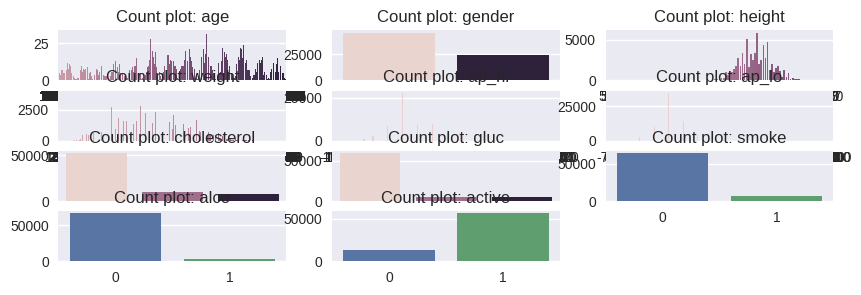

In [26]:
N_COLS = 3
N_ROWS = math.ceil(len(INPUT_FEATURES) / N_COLS)

plt.figure(figsize=(10,3))

for i, cat_feature in enumerate(INPUT_FEATURES):
    plt.subplot(N_ROWS, N_COLS, i+1)
    plt.title(f"Count plot: {cat_feature}")
    sns.countplot(df, x=cat_feature, hue=cat_feature,legend=False)
    plt.ylabel("")
    plt.xlabel('')

plt.show()

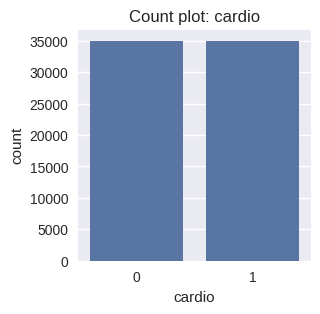

In [27]:
plt.figure(figsize=(3,3))
plt.title(f"Count plot: {TARGET}")
sns.countplot(df, x=TARGET)
plt.show()

* There is no bias in target column

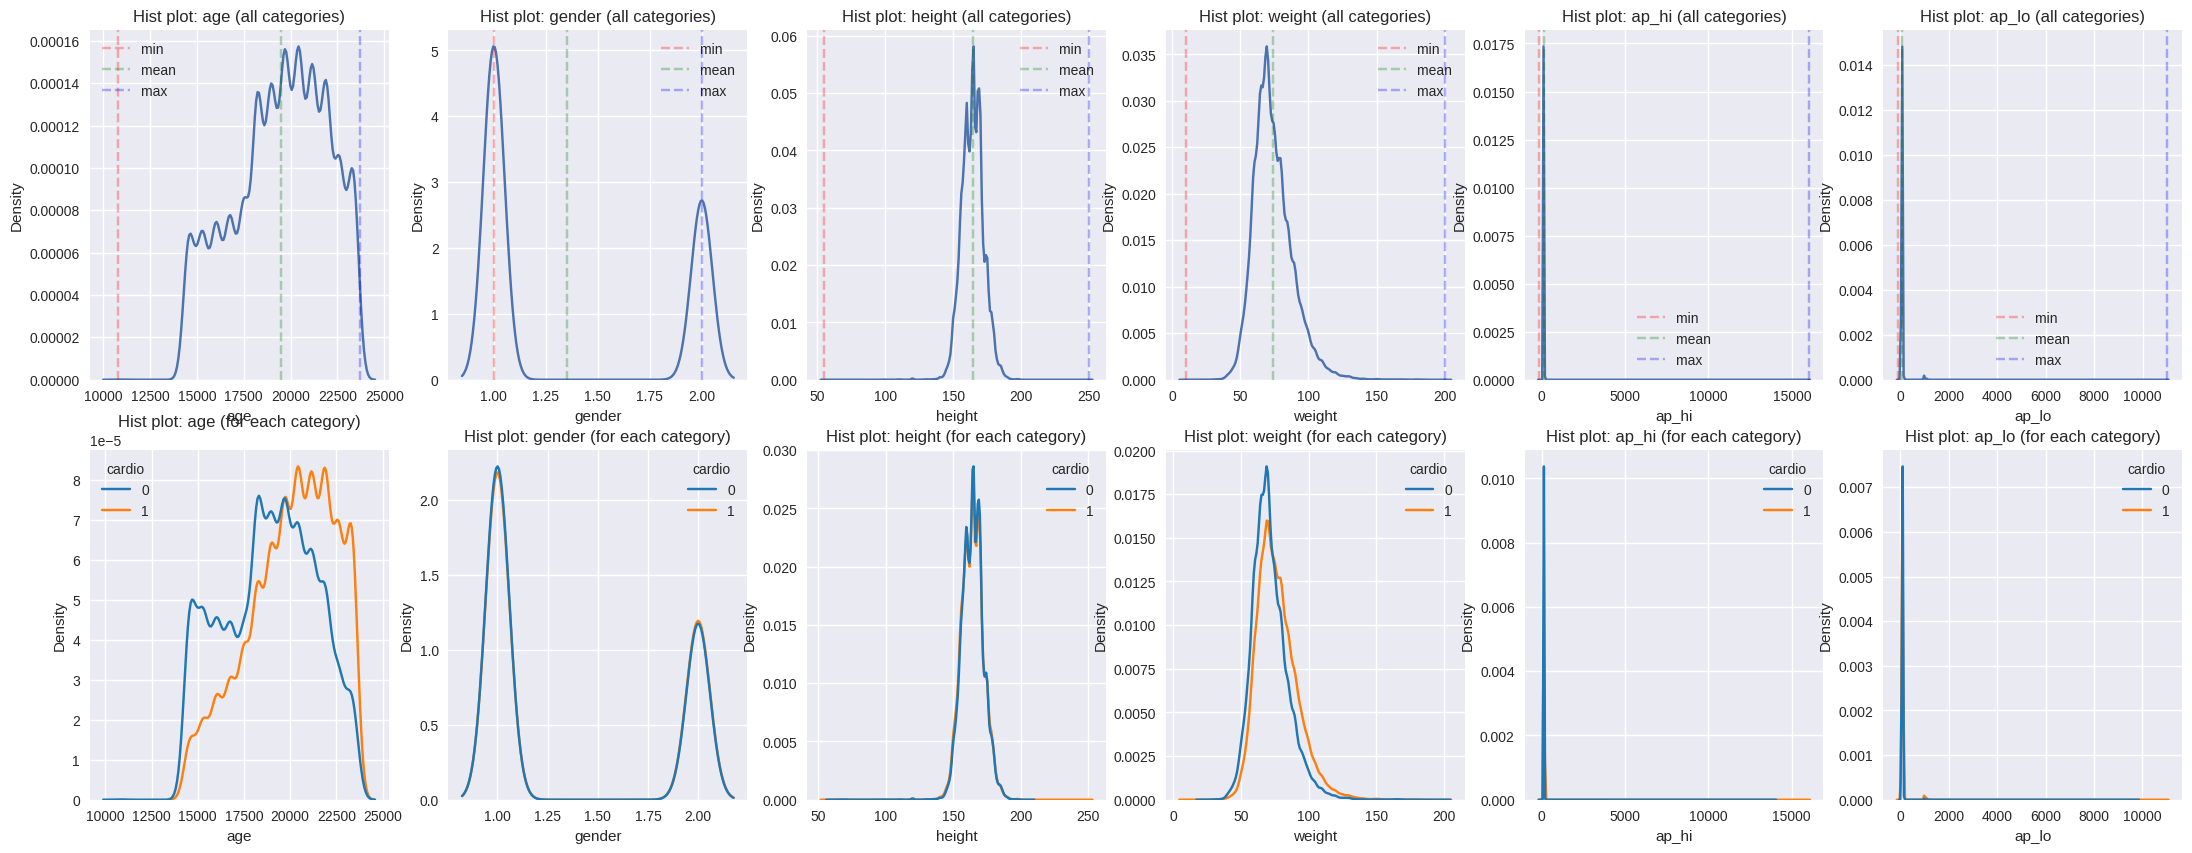

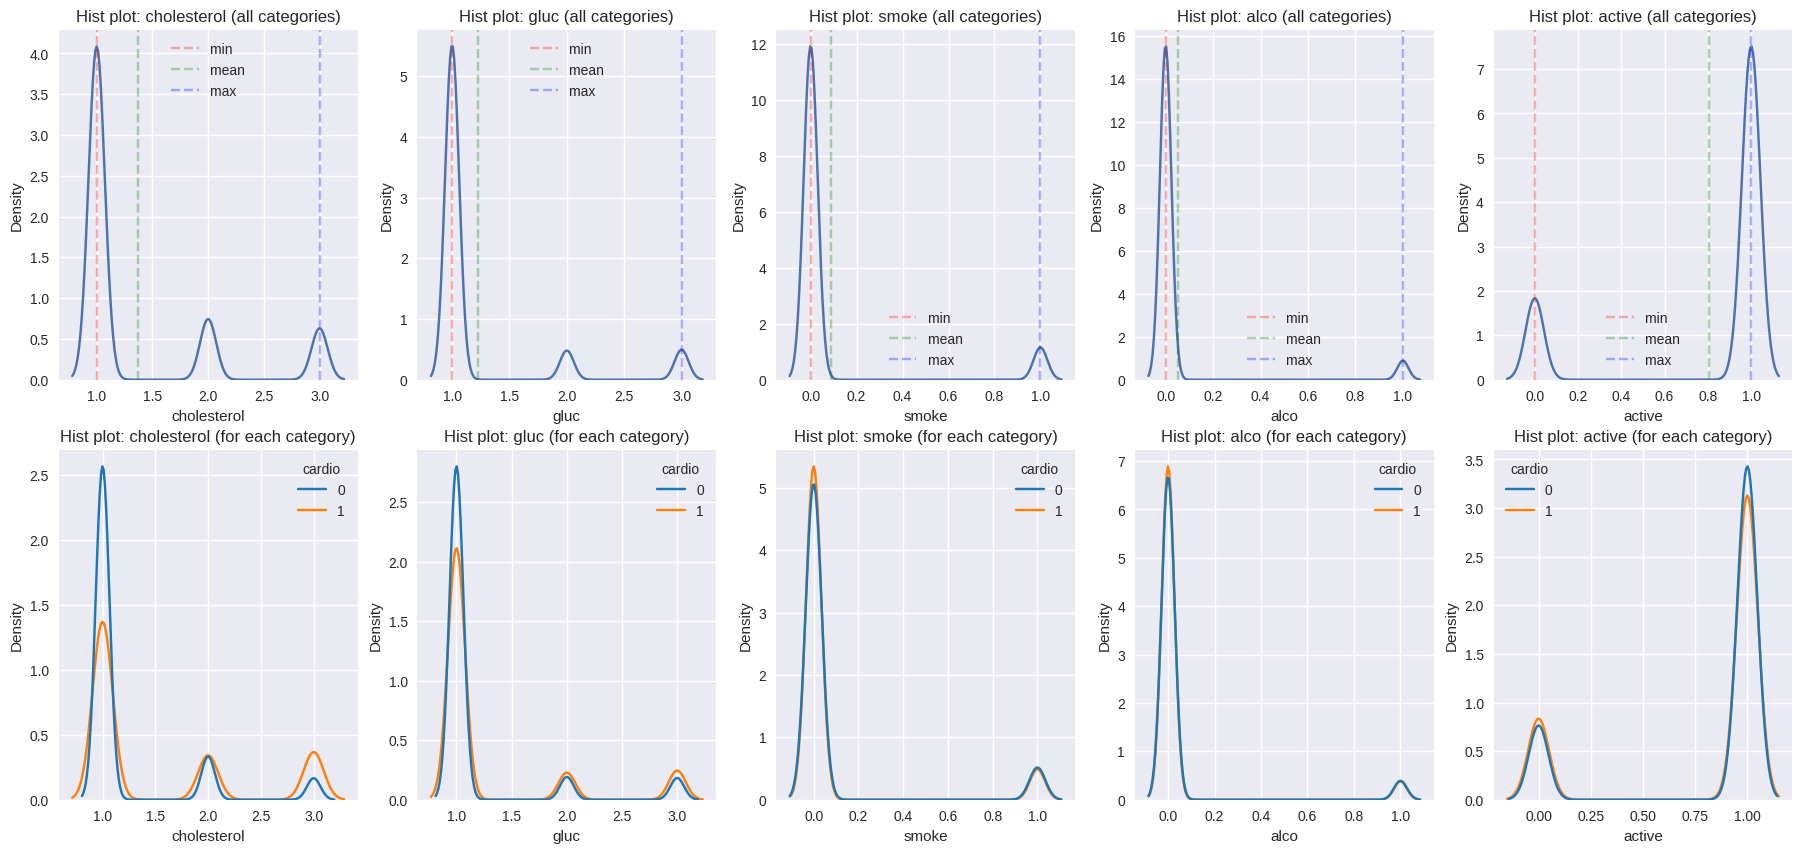

In [28]:
ROW_WIDTH = 6
temp = 0

for num_feature in INPUT_FEATURES:
    if temp == 0:
        plt.figure(figsize=(27,10))

    plt.subplot(2,ROW_WIDTH, temp + 1)
    plt.title(f"Hist plot: {num_feature} (all categories)")
    sns.kdeplot(df, x=num_feature, )

    plt.axvline(x= df[num_feature].min() , label="min", color='r', linestyle='--', alpha = 0.3)
    plt.axvline(x= df[num_feature].mean() , label="mean", color='g', linestyle='--', alpha = 0.3)
    plt.axvline(x= df[num_feature].max() , label="max", color='b', linestyle='--', alpha = 0.3)

    plt.legend()


    plt.subplot(2,ROW_WIDTH, (temp + 1) + ROW_WIDTH)
    plt.title(f"Hist plot: {num_feature} (for each category)")
    sns.kdeplot(df, x=num_feature, hue=TARGET, palette='tab10')

    if temp == ROW_WIDTH - 1:
        plt.show()

    temp = (temp + 1) % ROW_WIDTH

if temp != ROW_WIDTH - 1:
    plt.show()

Box plot

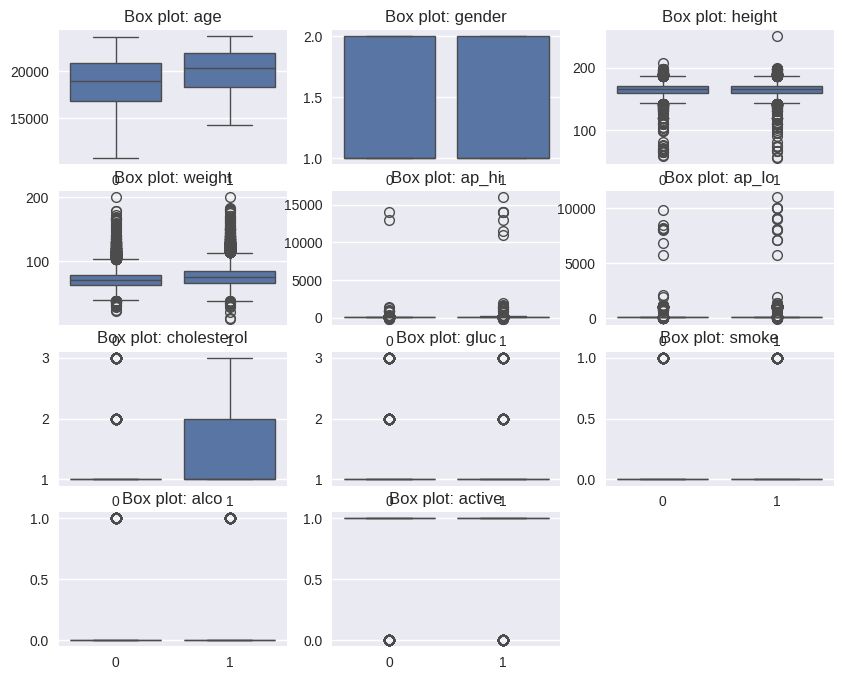

In [29]:
N_COLS = 3
N_ROWS = math.ceil(len(INPUT_FEATURES) / N_COLS)

plt.figure(figsize=(10,8))

for i, feature in enumerate(INPUT_FEATURES):
    plt.subplot(N_ROWS, N_COLS, i+1)
    plt.title(f"Box plot: {feature}")
    sns.boxplot(df, x=TARGET, y=feature)
    plt.ylabel("")
    plt.xlabel('')

plt.show()

EDA

In [30]:
#عايزين نحط هنا اسئلة و نجاوبها

print("Q1: Does age affect Cardio risk?")

Q1: Does age affect Cardio risk?


# Outliers

In [31]:
def plot_box(features, hue):
    ROW_WIDTH = 6
    temp = 0

    for num_feature in features:
        if temp == 0:
            plt.figure(figsize=(25,5))

        plt.subplot(1,ROW_WIDTH, temp + 1)
        plt.title(f"Box plot: {num_feature}")
        sns.boxplot(df, x=num_feature, hue=hue, palette='rocket')

        if temp == ROW_WIDTH - 1:
            plt.show()

        temp = (temp + 1) % ROW_WIDTH

    if temp != ROW_WIDTH - 1:
        plt.show()

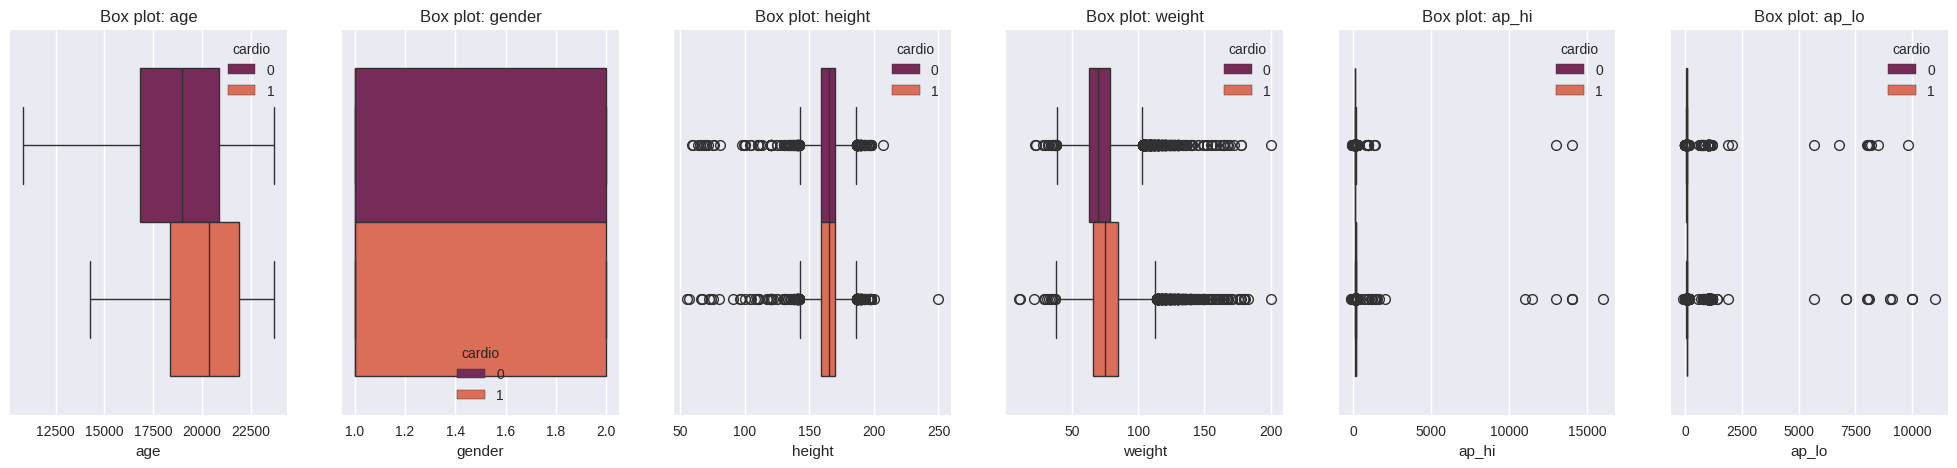

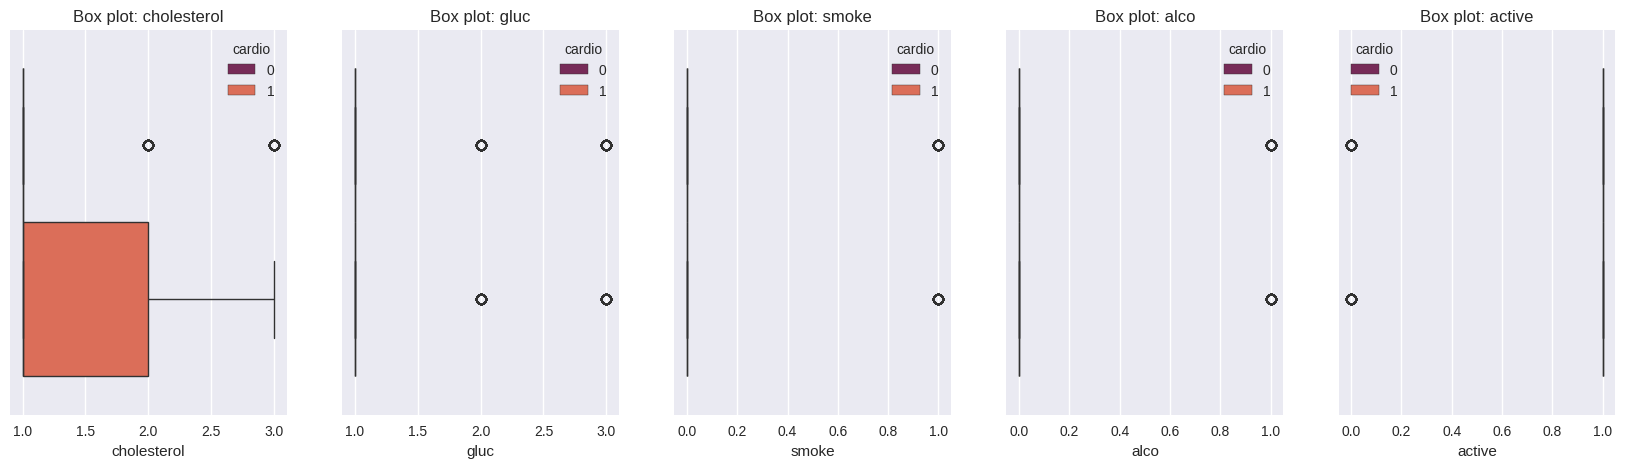

In [32]:
plot_box(INPUT_FEATURES, TARGET)

In [33]:


#قللت الاكيورسي
#IQR احسن
# df = df[(df['age_years'] >= 30) & (df['age_years'] <= 65)]

# # Height & weight filters
# df = df[(df['height'] >= 120) & (df['height'] <= 220)]
# df = df[(df['weight'] >= 30) & (df['weight'] <= 200)]

# # Blood pressure filters
# df = df[(df['ap_hi'] >= 90) & (df['ap_hi'] <= 250)]
# df = df[(df['ap_lo'] >= 60) & (df['ap_lo'] <= 200)]
# df = df[df['ap_lo'] <= df['ap_hi']]

# # Cholesterol & glucose
# df = df[df['cholesterol'].isin([1, 2, 3])]
# df = df[df['gluc'].isin([1, 2, 3])]

# # Lifestyle & target
# for col in ['smoke', 'alco', 'active', 'cardio']:
#     df = df[df[col].isin([0, 1])]

In [34]:
def IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    IQR = Q3 - Q1

    min_v = Q1 - 1.5 * IQR
    max_v = Q3 + 1.5 * IQR

    return series.clip(lower=min_v, upper=max_v)


In [35]:
exclude = ['gluc','alco','smoke','colesterol','active']

for num_feature in [f for f in INPUT_FEATURES if f not in exclude]:
    for gender_category in df[TARGET].unique():
        mask = df[TARGET] == gender_category
        df.loc[mask, num_feature] = IQR(df.loc[mask, num_feature])


/tmp/ipython-input-2631174373.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[168. 156. 151. ... 159. 168. 170.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, num_feature] = IQR(df.loc[mask, num_feature])


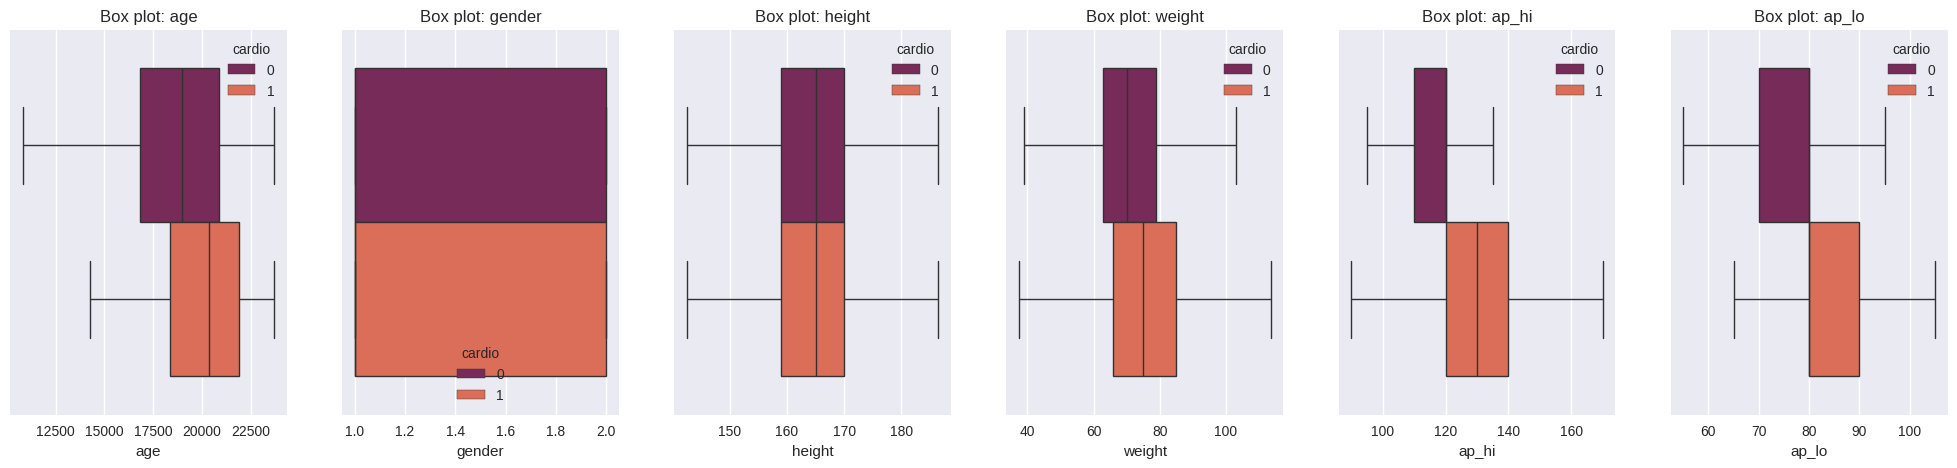

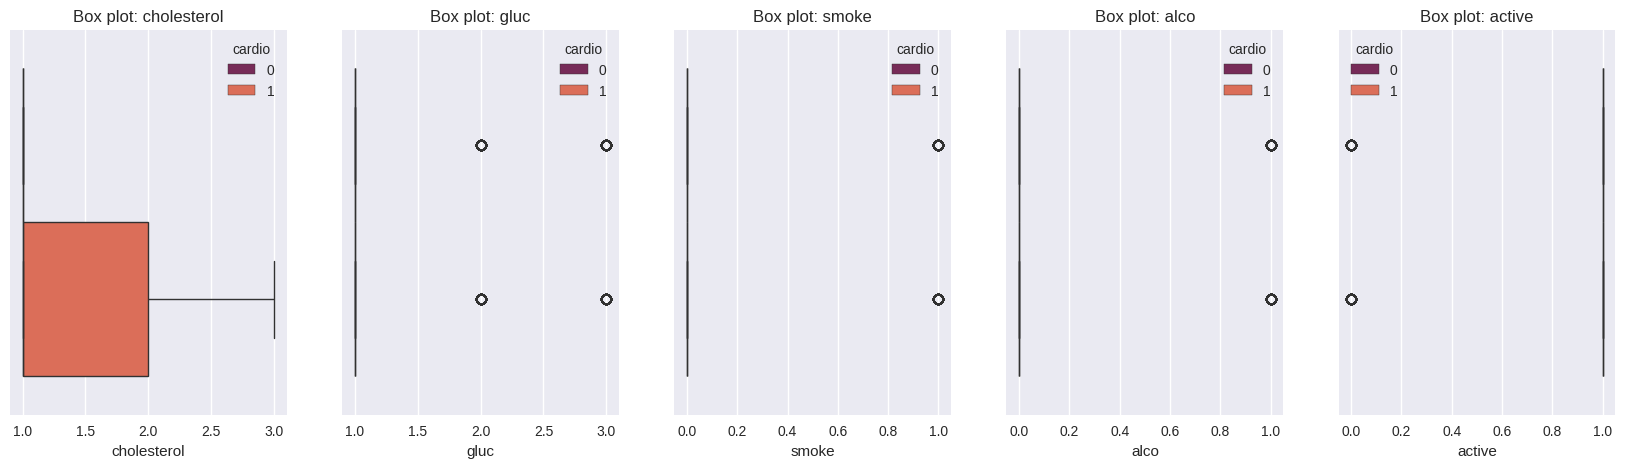

In [36]:
plot_box(INPUT_FEATURES, TARGET)

# Feauter Engineering

In [37]:
INPUT_FEATURES

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [38]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168.0,62.0,110,80,1,1,0,0,1,0
1,20228,1,156.0,85.0,140,90,3,1,0,0,1,1
2,18857,1,165.0,64.0,130,70,3,1,0,0,0,1
3,17623,2,169.0,82.0,150,100,1,1,0,0,1,1
4,17474,1,156.0,56.0,100,60,1,1,0,0,0,0


In [39]:

#نخلي العمر بالسنة
df['age_years'] = (df['age'] / 365).round().astype(int)
# df = drop_unnwanted_features(df, 'age')





In [40]:
# نحول ال hight للمتر
df['height'] = df['height'] / 100

In [41]:

# نحسب ال BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)



In [42]:
#  فرق ضغط الدم (Pulse Pressure = Systolic - Diastolic)
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']


In [43]:

df['health_index'] = (df['active'] * 1) - (df['smoke'] * 0.5) - (df['alco'] * 0.5)



In [44]:
df['cholesterol_gluc_interaction'] = df['cholesterol'] * df['gluc']


In [45]:
new_features = [
    'age_years',
    'age_years',
    'bmi',
    'pulse_pressure',
    'health_index',
    'cholesterol_gluc_interaction'
]
INPUT_FEATURES = INPUT_FEATURES + [f for f in new_features if f not in INPUT_FEATURES]


In [46]:
# df = drop_unnwanted_features(df, 'id')
df = drop_unnwanted_features(df, 'age')
df = drop_unnwanted_features(df, 'height')
# df = drop_unnwanted_features(df, 'weight')
# df = drop_unnwanted_features(df, 'ap_hi')
# df = drop_unnwanted_features(df, 'ap_lo')
# df = drop_unnwanted_features(df, 'gluc')
# df = drop_unnwanted_features(df, 'cholesterol')
# df = drop_unnwanted_features(df, 'active')


Dropping features: age
Dropping features: height


In [47]:
df.columns

Index(['gender', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'age_years', 'bmi', 'pulse_pressure',
       'health_index', 'cholesterol_gluc_interaction'],
      dtype='object')

In [48]:
INPUT_FEATURES=['gender', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'age_years', 'bmi', 'pulse_pressure',
       'health_index', 'cholesterol_gluc_interaction']

In [49]:
INPUT_FEATURES

['gender',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'age_years',
 'bmi',
 'pulse_pressure',
 'health_index',
 'cholesterol_gluc_interaction']

# Correlation Matrix

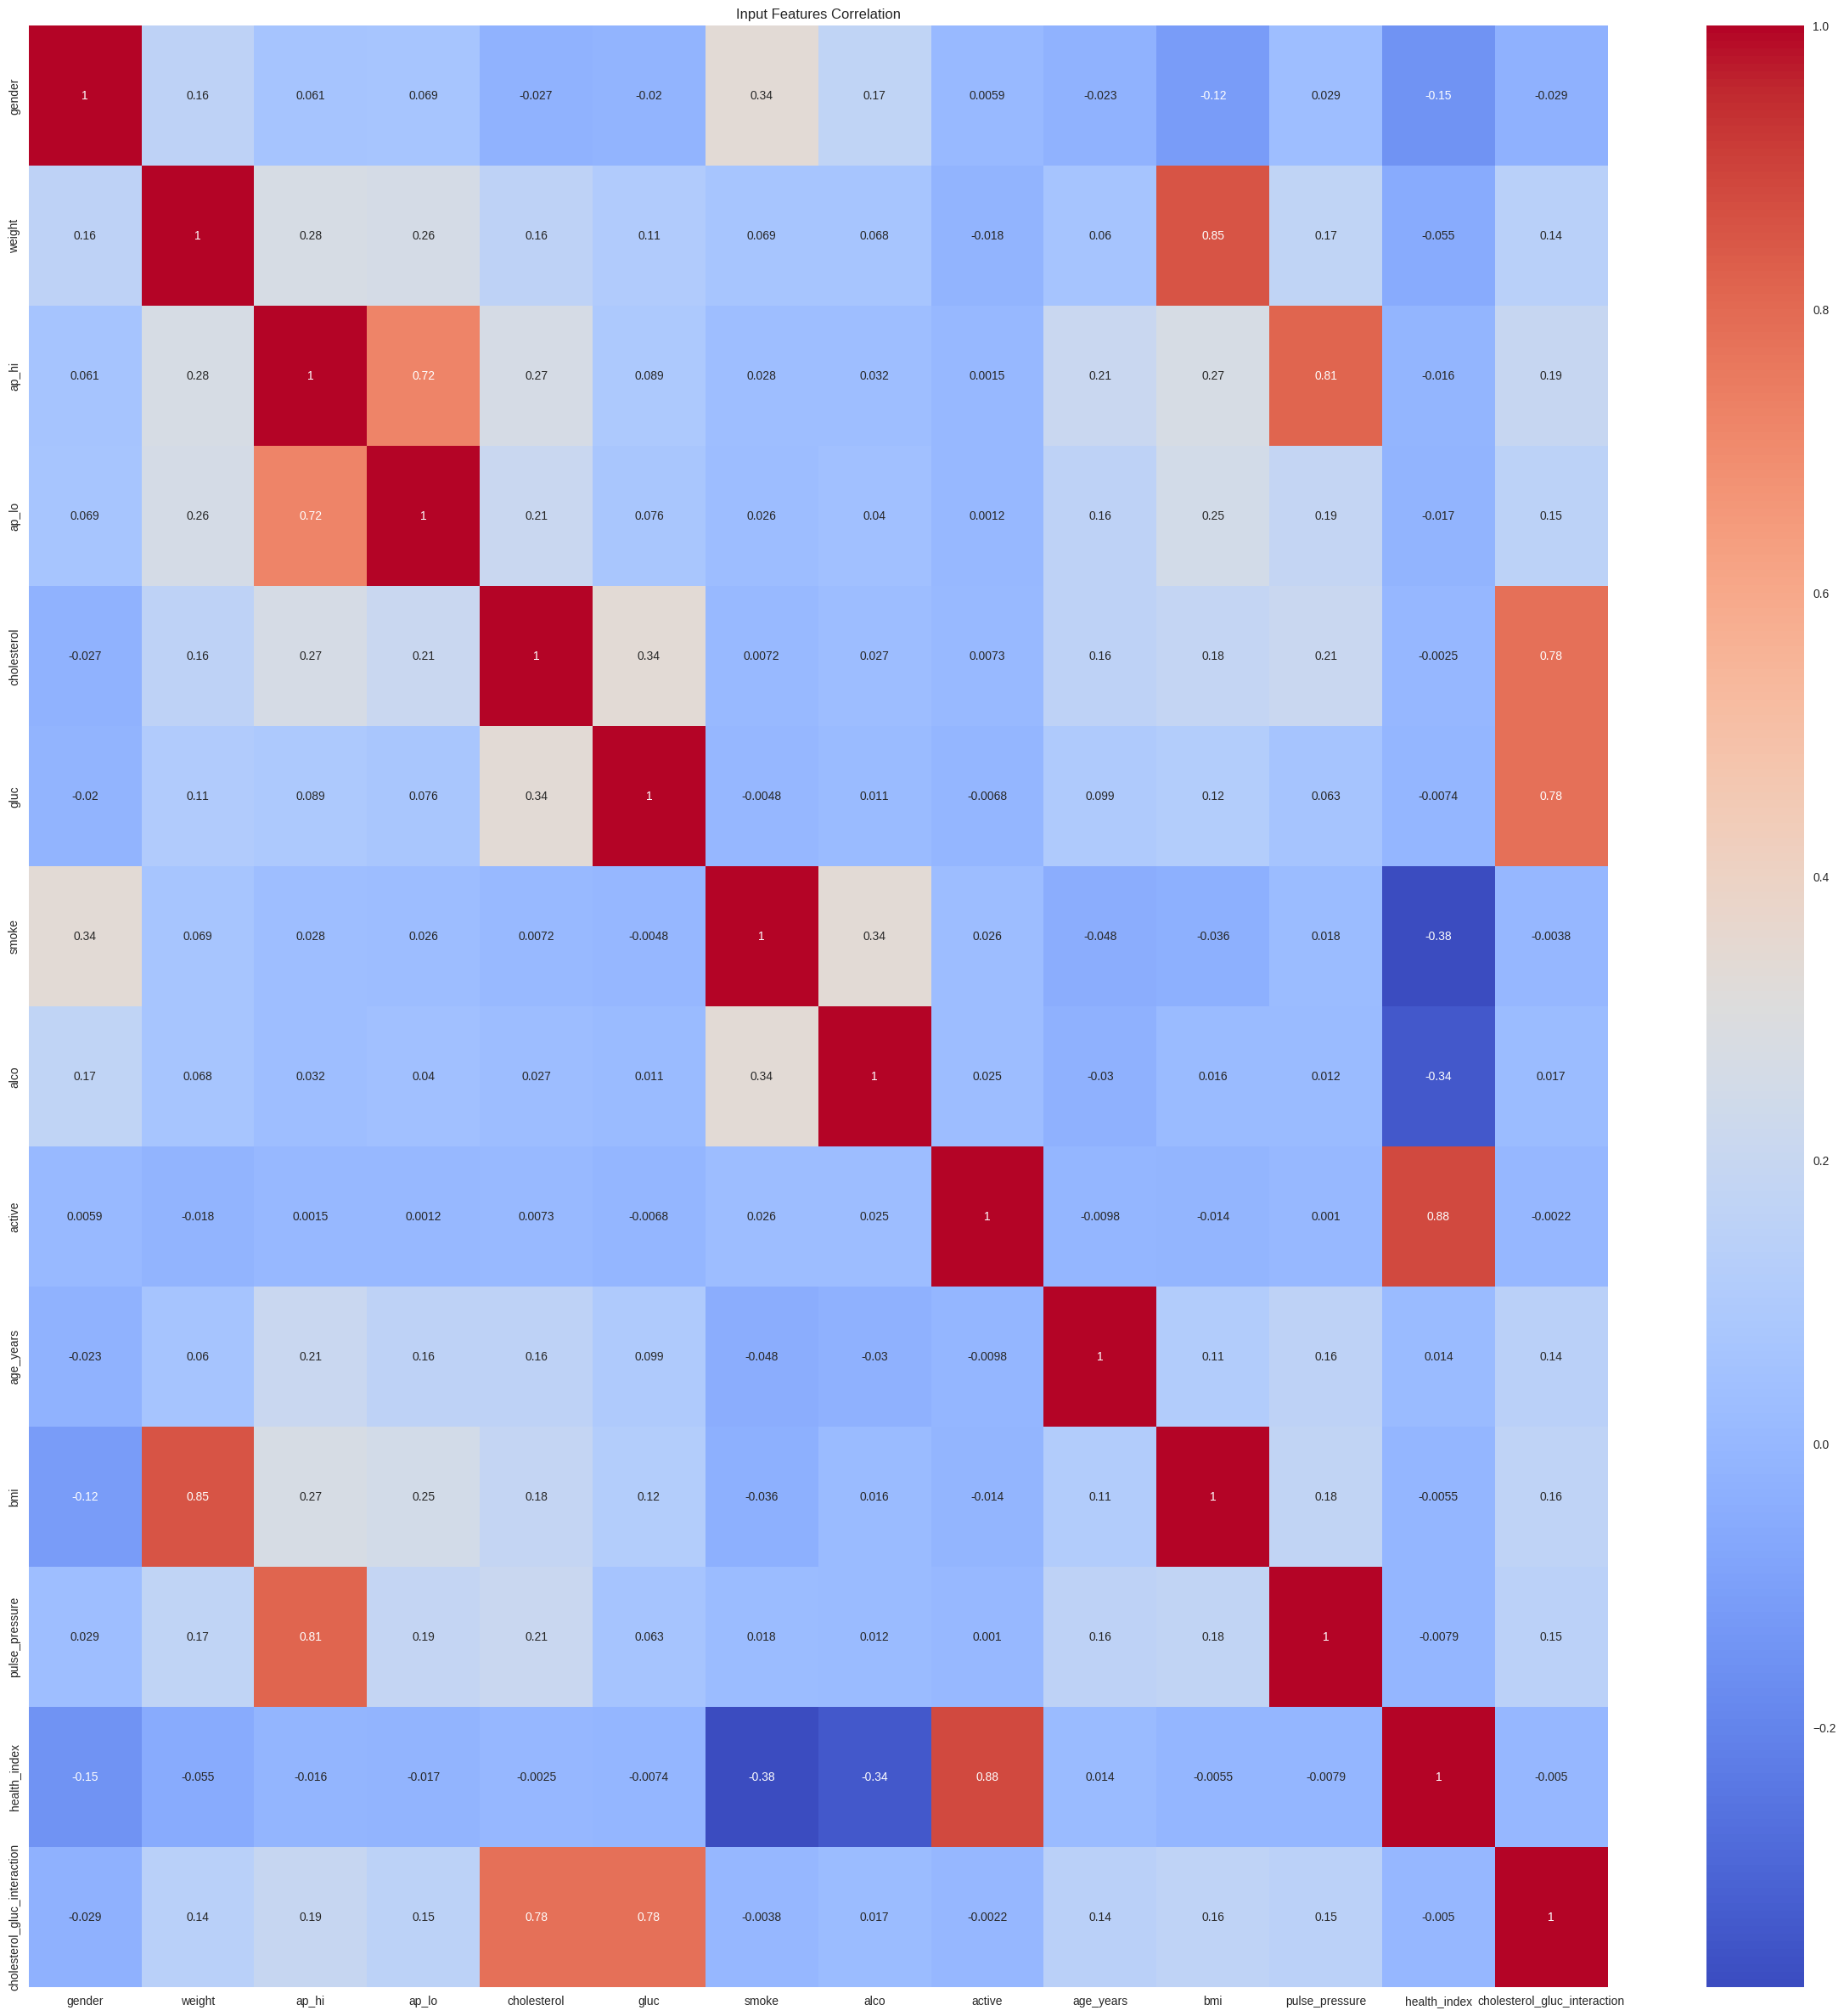

In [50]:
plt.figure(figsize=(30, 30))

plt.title("Input Features Correlation")

sns.heatmap(
    df[INPUT_FEATURES].corr(),
    annot=True,
    cmap='coolwarm',
    )

plt.show()

F1 test (ANOVA)

F-value: Measures how much the means between groups differ relative to the variance within the groups. Higher = more likely the feature is important.

p-value: Probability that the observed difference is due to chance.

p < 0.05 → Statistically significant

p ≥ 0.05 → Not significant

In [51]:
f_values, p_values = f_classif(df[INPUT_FEATURES], df[TARGET])

for i in range(len(INPUT_FEATURES)):
    print(f"{INPUT_FEATURES[i]:15s}: F-value = {f_values[i]:6.3f}, p-value = {p_values[i]:3.3f}")

gender         : F-value =  4.604, p-value = 0.032
weight         : F-value = 2702.000, p-value = 0.000
ap_hi          : F-value = 21922.892, p-value = 0.000
ap_lo          : F-value = 11575.413, p-value = 0.000
cholesterol    : F-value = 15554.452, p-value = 0.000
gluc           : F-value = 562.773, p-value = 0.000
smoke          : F-value = 16.791, p-value = 0.000
alco           : F-value =  3.761, p-value = 0.052
active         : F-value = 89.091, p-value = 0.000
age_years      : F-value = 4193.662, p-value = 0.000
bmi            : F-value = 3015.623, p-value = 0.000
pulse_pressure : F-value = 11607.067, p-value = 0.000
health_index   : F-value = 44.285, p-value = 0.000
cholesterol_gluc_interaction: F-value = 6925.072, p-value = 0.000


We should drop features which has p value > 0.05

In [52]:
# df = drop_unnwanted_features(df, 'alco') # بس هسيبها عشان فرق صغير


## Scaling

In [53]:
df.describe()

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,pulse_pressure,health_index,cholesterol_gluc_interaction
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,73.963974,126.230657,81.527071,1.258543,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686,274023.397198,44.703586,0.732779,1.661729
std,0.476838,13.564876,15.593516,9.240543,0.606716,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294,49827.573943,10.962455,0.442992,1.621911
min,1.000000,37.500000,90.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,118356.268148,-15.000000,-1.000000,1.000000
25%,1.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,238751.147842,40.000000,0.500000,1.000000
50%,1.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,263778.980980,40.000000,1.000000,1.000000
75%,2.000000,82.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,301204.819277,50.000000,1.000000,2.000000
max,2.000000,113.500000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,558941.212681,105.000000,1.000000,9.000000


In [54]:
#مش مفيدة
# min_max_scaler = MinMaxScaler()
# exclude = ['gluc','alco','smoke','colesterol','active','cardio','height']
# cols_to_scale = [col for col in df.columns if col not in exclude]
# df[cols_to_scale] = min_max_scaler.fit_transform(df[cols_to_scale])


In [55]:
df.head()

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,pulse_pressure,health_index,cholesterol_gluc_interaction
0,2,62.0,110,80,1,1,0,0,1,0,50,219671.201814,30,1.0,1
1,1,85.0,140,90,3,1,0,0,1,1,55,349276.791584,50,1.0,3
2,1,64.0,130,70,3,1,0,0,0,1,52,235078.053260,60,0.0,3
3,2,82.0,150,100,1,1,0,0,1,1,48,287104.793250,50,1.0,1
4,1,56.0,100,60,1,1,0,0,0,0,48,230111.768573,40,0.0,1


In [56]:
df.describe()

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,pulse_pressure,health_index,cholesterol_gluc_interaction
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,73.963974,126.230657,81.527071,1.258543,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686,274023.397198,44.703586,0.732779,1.661729
std,0.476838,13.564876,15.593516,9.240543,0.606716,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294,49827.573943,10.962455,0.442992,1.621911
min,1.000000,37.500000,90.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,118356.268148,-15.000000,-1.000000,1.000000
25%,1.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,238751.147842,40.000000,0.500000,1.000000
50%,1.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,263778.980980,40.000000,1.000000,1.000000
75%,2.000000,82.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,301204.819277,50.000000,1.000000,2.000000
max,2.000000,113.500000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,558941.212681,105.000000,1.000000,9.000000


# Dataset Splitting

In [57]:
X_train,X_test, y_train, y_test = train_test_split(
    df.drop(TARGET, axis=1),
    df.loc[:, TARGET],
    test_size=0.25,
    random_state=1234,
    stratify=df.loc[:, TARGET],
  )

In [58]:
print(f"{X_train.shape= }")
print(f"{y_train.shape= }")
print(f"{X_test.shape= }")
print(f"{y_test.shape= }")

X_train.shape= (52500, 14)
y_train.shape= (52500,)
X_test.shape= (17500, 14)
y_test.shape= (17500,)


In [59]:
y_train.value_counts()

,count
cardio,
0,26266
1,26234


In [60]:
y_test.value_counts()

,count
cardio,
0,8755
1,8745


In [61]:
list(X_train.columns)

['gender',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'age_years',
 'bmi',
 'pulse_pressure',
 'health_index',
 'cholesterol_gluc_interaction']

In [62]:
# #هنقسم بس عشان ناخد راختنا في التدريب
# dfsample, _ = train_test_split(
#     df,
#     test_size=0.9,   # يعني هنسيب 90% ونشتغل على 10%
#     stratify=df["cardio"],
#     random_state=42
# )
# X_train,X_test, y_train, y_test = train_test_split(
#     df.drop(TARGET, axis=1),
#     df.loc[:, TARGET],
#     test_size=0.25,
#     random_state=1234,
#     stratify=df.loc[:, TARGET],
#   )
# #بعد ما نخلص هنعمل كومنت للجزء دا

# Model Definition & Training

In [63]:
CACHE_MODELS_DIR_NAME = 'models_cache'
os.makedirs(CACHE_MODELS_DIR_NAME, exist_ok=True)

In [64]:
import os
import pickle
import re

class CustomModel:
    def __init__(self, name, model, extra_train_param=None):
        self.name = str(name)
        self.model = model
        self.extra_train_param = extra_train_param

        self.y_train_hat = None
        self.y_test_hat = None
        self.feature_names = None  # هنخزن الأعمدة هنا

        self.load()

    def fit(self, x_train, y_train):
        if not getattr(self, "trained", False):
            if self.extra_train_param is None:
                self.model.fit(x_train, y_train)
            else:
                self.model.fit(x_train, y_train, **self.extra_train_param)

            # نخزن الأعمدة
            self.feature_names = list(x_train.columns)

            self.trained = True
            self.save()

    def _align_features(self, X):
        """يتأكد إن X نفس الأعمدة اللي اتدرب عليها"""
        if self.feature_names is not None:
            missing_cols = set(self.feature_names) - set(X.columns)
            extra_cols = set(X.columns) - set(self.feature_names)

            if missing_cols:
                raise ValueError(f"Missing columns in input: {missing_cols}")
            if extra_cols:
                # ممكن بس نتجاهل الزيادة ونرتب الصح
                X = X[self.feature_names]
            else:
                X = X[self.feature_names]

        return X

    def prdict_on_train(self, x_train):
        if self.y_train_hat is None:
            x_train = self._align_features(x_train)
            self.y_train_hat = self.model.predict(x_train)

    def prdict_on_test(self, x_test):
        if self.y_test_hat is None:
            x_test = self._align_features(x_test)
            self.y_test_hat = self.model.predict(x_test)

    def save(self):
        file_name = re.sub(r'\W+', '_', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.pickle'
        with open(file_path, 'wb') as f:
            pickle.dump(
                {
                    "model": self.model,
                    "trained": self.trained,
                    "feature_names": self.feature_names
                },
                f
            )

    def load(self):
        file_name = re.sub(r'\W+', '_', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.pickle'

        if os.path.exists(file_path):
            with open(file_path, 'rb') as f:
                data = pickle.load(f)
                self.model = data["model"]
                self.trained = data["trained"]
                self.feature_names = data.get("feature_names", None)
        else:
            self.trained = False


In [65]:
models_list = []

models_list.append(CustomModel("Logistic Regression", LogisticRegression()))

# models_list.append(CustomModel("SVC rbf sigmoid", SVC( ))) #بيطول بغباء

models_list.append(CustomModel("Decision Tree max-depth=7", DecisionTreeClassifier(max_depth=7 )))
models_list.append(CustomModel("Decision Tree max-depth=10", DecisionTreeClassifier(max_depth=10,min_samples_split=7,min_samples_leaf=3,criterion='gini' )))

models_list.append(CustomModel("Random Forest, trees=3", RandomForestClassifier(n_estimators=3 )))
models_list.append(CustomModel("Random Forest, trees=5", RandomForestClassifier(n_estimators=5 )))


# models_list.append(CustomModel("Ada Boost estimator=5 max_depth=2", AdaBoostClassifier(n_estimators=5, estimator=RandomForestClassifier(max_depth=2))))

models_list.append(CustomModel("Gradient Boosting estimator=3", GradientBoostingClassifier(n_estimators=3)))


In [66]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Train {model.name}')
    model.fit(X_train,y_train)

  1/6. Train Logistic Regression
  2/6. Train Decision Tree max-depth=7
  3/6. Train Decision Tree max-depth=10
  4/6. Train Random Forest, trees=3
  5/6. Train Random Forest, trees=5
  6/6. Train Gradient Boosting estimator=3


# Model Prediction & Evaluation

Prediction

In [67]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on train data')
    model.prdict_on_train(X_train)

  1/6. Predict Logistic Regression on train data
  2/6. Predict Decision Tree max-depth=7 on train data
  3/6. Predict Decision Tree max-depth=10 on train data
  4/6. Predict Random Forest, trees=3 on train data
  5/6. Predict Random Forest, trees=5 on train data
  6/6. Predict Gradient Boosting estimator=3 on train data


In [68]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on test data')
    model.prdict_on_test(X_test)

  1/6. Predict Logistic Regression on test data
  2/6. Predict Decision Tree max-depth=7 on test data
  3/6. Predict Decision Tree max-depth=10 on test data
  4/6. Predict Random Forest, trees=3 on test data
  5/6. Predict Random Forest, trees=5 on test data
  6/6. Predict Gradient Boosting estimator=3 on test data


Evaluation

In [69]:
evaluation_dataset = []

for i, model in enumerate(models_list):
    print(f'{i+1:02d}/{len(models_list)}. Evaluate {model.name}')

    accuracy_score_train = accuracy_score( y_train, model.y_train_hat )
    accuracy_score_test = accuracy_score( y_test, model.y_test_hat )

    recall_score_train = recall_score( y_train, model.y_train_hat )
    recall_score_test = recall_score( y_test, model.y_test_hat )

    precision_score_train = precision_score( y_train, model.y_train_hat )
    precision_score_test = precision_score( y_test, model.y_test_hat )

    f1_score_train = f1_score( y_train, model.y_train_hat )
    f1_score_test = f1_score( y_test, model.y_test_hat)

    roc_auc_score_train = roc_auc_score( y_train, model.y_train_hat )
    roc_auc_score_test = roc_auc_score( y_test, model.y_test_hat)


    evaluation_dataset.append({
        "model": model.name, 'accuracy_score': accuracy_score_train,
        'recall_score': recall_score_train, 'f1_score':f1_score_train,
        'roc_auc_score':roc_auc_score_train, 'precision_score':precision_score_train,
        'data':'train'}
    )

    evaluation_dataset.append({
        "model": model.name, 'accuracy_score': accuracy_score_test,
        'recall_score': recall_score_test, 'f1_score':f1_score_test,
        'roc_auc_score':roc_auc_score_test, 'precision_score':precision_score_test,
        'data':'test'}
    )


    # print(evaluation_dataset[-2])
    # print(evaluation_dataset[-1])
    print('\n')


evaluation_dataset = pd.DataFrame(evaluation_dataset)

01/6. Evaluate Logistic Regression


02/6. Evaluate Decision Tree max-depth=7


03/6. Evaluate Decision Tree max-depth=10


04/6. Evaluate Random Forest, trees=3


05/6. Evaluate Random Forest, trees=5


06/6. Evaluate Gradient Boosting estimator=3




In [70]:
evaluation_dataset.sort_values('f1_score', ascending=False)


,model,accuracy_score,recall_score,f1_score,roc_auc_score,precision_score,data
8,"Random Forest, trees=5",0.954781,0.940116,0.954081,0.954772,0.968468,train
6,"Random Forest, trees=3",0.941981,0.926317,0.941024,0.941971,0.956205,train
4,Decision Tree max-depth=10,0.827562,0.694938,0.801099,0.827481,0.945542,train
5,Decision Tree max-depth=10,0.825086,0.692624,0.798287,0.825010,0.941991,test
9,"Random Forest, trees=5",0.800000,0.763065,0.792236,0.799979,0.823725,test
7,"Random Forest, trees=3",0.793714,0.765809,0.787697,0.793698,0.810873,test
2,Decision Tree max-depth=7,0.822838,0.646070,0.784694,0.822730,0.999057,train
3,Decision Tree max-depth=7,0.822743,0.645626,0.784494,0.822642,0.999469,test
10,Gradient Boosting estimator=3,0.812590,0.624952,0.769195,0.812476,1.000000,train
11,Gradient Boosting estimator=3,0.812400,0.624585,0.768917,0.812293,1.000000,test


In [71]:
print("Best Model in F1 Score test")
evaluation_dataset[evaluation_dataset['data']=='test'].sort_values('f1_score',ascending=False).iloc[0,:]

Best Model in F1 Score test


,5
model,Decision Tree max-depth=10
accuracy_score,0.825086
recall_score,0.692624
f1_score,0.798287
roc_auc_score,0.82501
precision_score,0.941991
data,test


In [72]:
print("Best Model in ROC-AUC test")
evaluation_dataset[evaluation_dataset['data']=='test'].sort_values('roc_auc_score',ascending=False).iloc[0,:]

Best Model in ROC-AUC test


,5
model,Decision Tree max-depth=10
accuracy_score,0.825086
recall_score,0.692624
f1_score,0.798287
roc_auc_score,0.82501
precision_score,0.941991
data,test


We can confirm that 'Decision Tree max-depth=7' is a good generalized Model

> Add blockquote




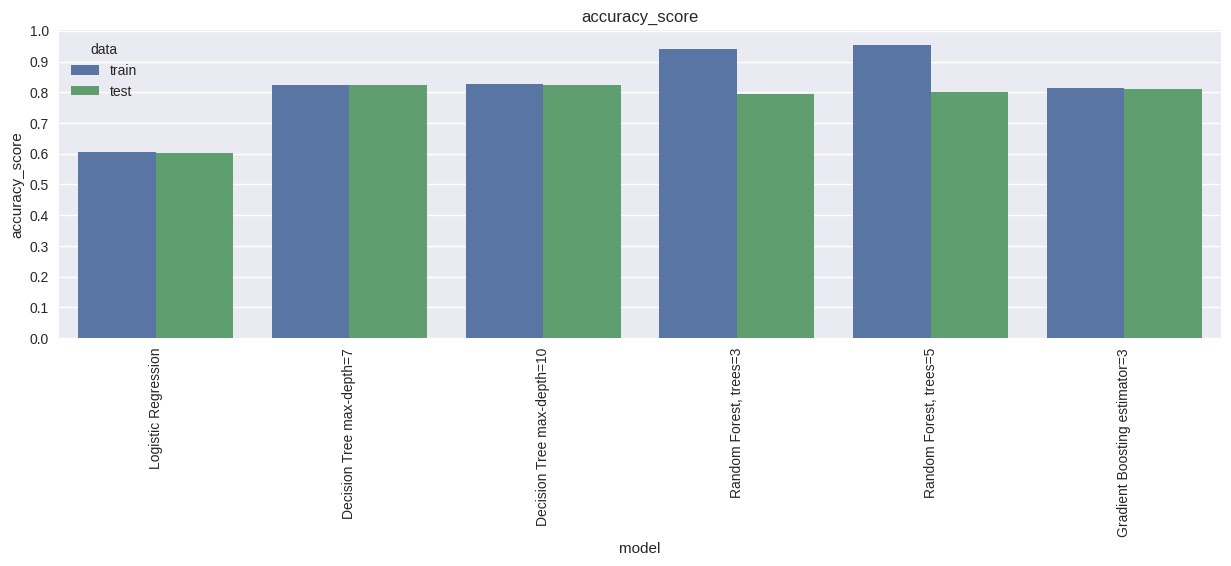

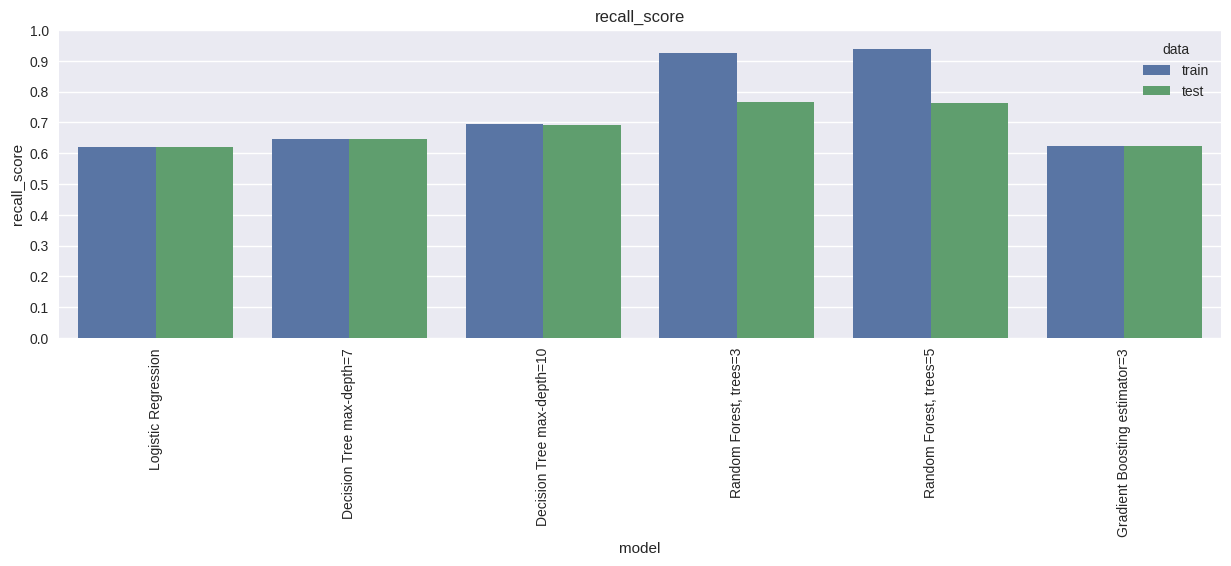

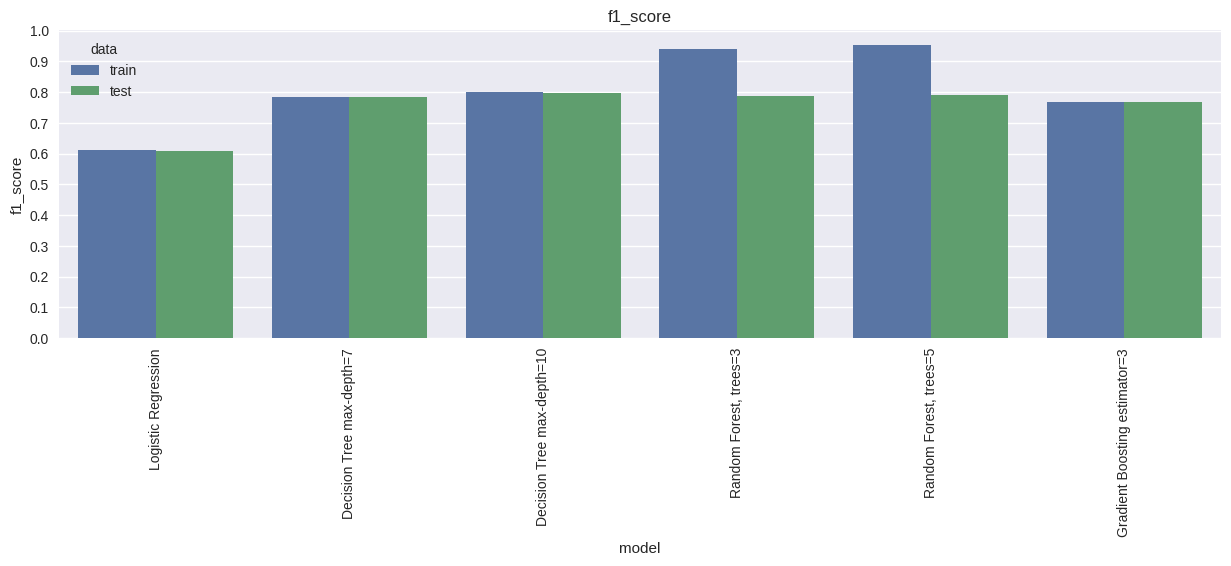

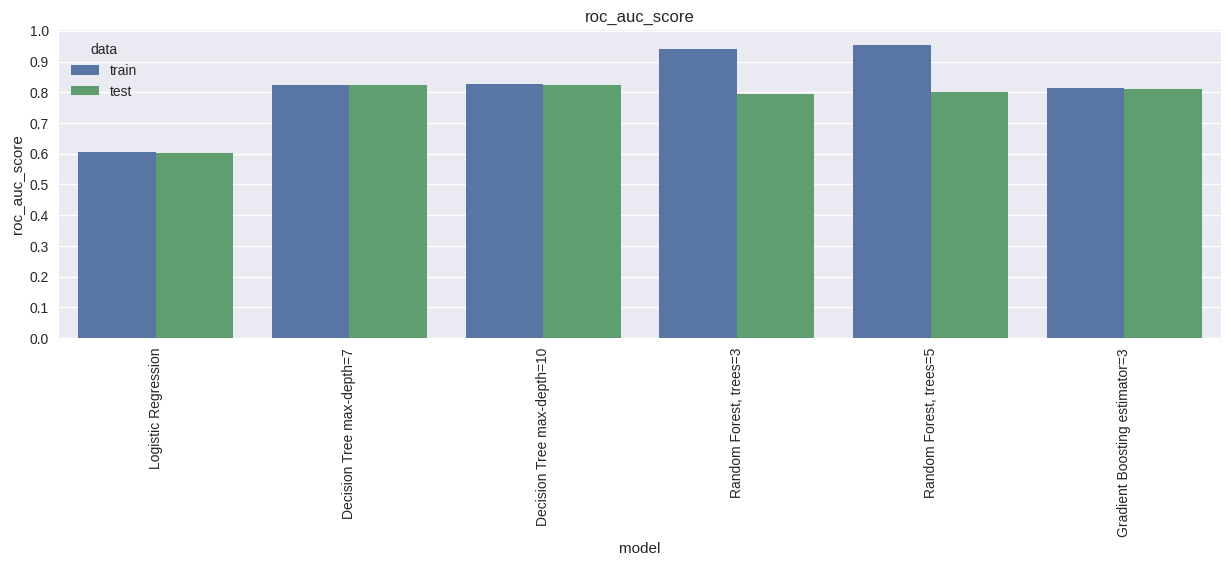

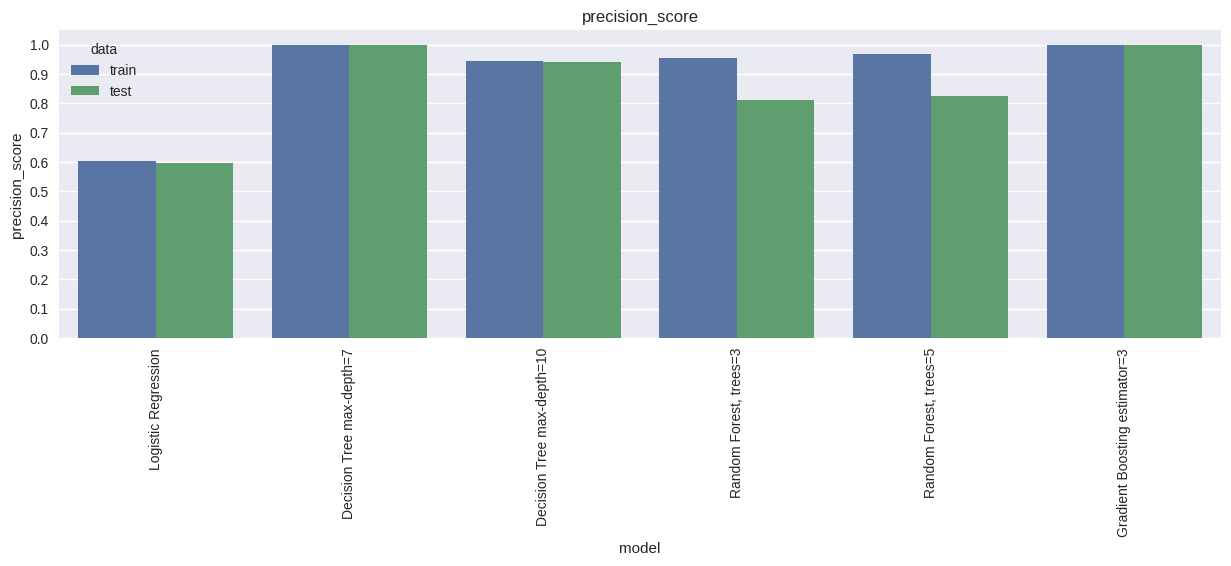

In [73]:
for metric in evaluation_dataset.columns:
    if metric in ['model', 'data']:
        continue

    plt.figure(figsize=(15,4))
    plt.title(f"{metric}")
    sns.barplot(evaluation_dataset, x='model',y=metric, hue='data')
    plt.xticks(rotation = 90)
    plt.yticks(np.linspace(0,1,11))
    plt.show()

# Caching

metrics

In [74]:
# دي عشان نحطها في البرزنتيشن
evaluation_dataset.to_csv("eval_dataset.csv")

In [75]:
# دول عشان ال streamlit
CAHCE_Y_VS_Y_HAT_DIR_NAME = 'models_predictions'
os.makedirs(CAHCE_Y_VS_Y_HAT_DIR_NAME, exist_ok=True)

In [76]:
# الكود بيعدي على كل موديل ويحفظ القيم الحقيقية والمتوقعة (للـ train و test) والفروق بينهم في ملفات CSV

for model in models_list:
    pad_width = len(y_train) - len(y_test)

    pd.DataFrame(
        {
            'actual Y train' : y_train,
            'predict Y train' : model.y_train_hat,
            'Train Diff':  y_train - model.y_train_hat,
            'actual Y test' : np.pad(y_test, (0, pad_width), mode='constant', constant_values=-1),
            'predict Y test' : np.pad(model.y_test_hat, (0, pad_width), mode='constant', constant_values=-1),
            'Test Diff':  np.pad(y_test - model.y_test_hat, (0, pad_width), mode='constant'),
#
        }
    ).to_csv(f"{CAHCE_Y_VS_Y_HAT_DIR_NAME}/{model.name}.csv")

ecoders & scalers

In [77]:
# CACHE_SCALE_DIR_NAME = 'encoders_scalers'
# os.makedirs(CACHE_SCALE_DIR_NAME, exist_ok=True)

In [78]:
# def save_obj(obj, file_name):
#     with open(file_name, 'wb') as f:
#         pickle.dump(obj, f)

# def load_obj(file_name):
#     with open(file_name, 'rb') as f:
#         return pickle.load(f)

In [79]:
# save_obj( min_max_scaler, f"{CACHE_SCALE_DIR_NAME}/min-max-scaler.pickle" )

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create Decision Tree with max depth 10
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 0.83


In [86]:
X_train

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,pulse_pressure,health_index,cholesterol_gluc_interaction
30319,1,75.0,110,80,1,1,0,0,0,41,247720.967103,30,0.0,1
59355,2,94.0,120,80,1,1,0,0,1,50,337050.449998,40,1.0,1
21321,1,85.0,135,90,1,1,0,0,1,49,319921.713275,45,1.0,1
53768,1,110.0,170,100,1,1,0,0,0,54,429687.500000,70,0.0,1
33684,1,53.0,110,80,1,2,0,0,1,50,223477.820880,30,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13266,2,98.0,130,80,1,1,1,0,0,52,305858.119285,50,-0.5,1
51202,2,76.0,120,80,1,1,0,0,1,56,248163.265306,40,1.0,1
24640,1,70.0,110,70,1,1,0,0,0,47,242214.532872,40,0.0,1
67654,1,59.5,95,70,1,1,0,0,1,50,218549.127640,25,1.0,1


In [89]:
y_train

,cardio
30319,0
59355,0
21321,0
53768,1
33684,0
...,...
13266,0
51202,0
24640,0
67654,0


In [87]:
!pip install -q gradio joblib


In [91]:


import joblib, pandas as pd, numpy as np, gradio as gr, os
from google.colab import files

MODEL_FILENAME = "decision_tree_model.pkl"



# Load model
model = joblib.load(MODEL_FILENAME)
print("✅ Model loaded")

# Prediction function
def predict_cardio(
    gender, weight, ap_hi, ap_lo,
    cholesterol, gluc, smoke_bool, alco_bool, active_bool, age_years, bmi_input
):
    smoke = 1 if smoke_bool else 0
    alco = 1 if alco_bool else 0
    active = 1 if active_bool else 0

    pulse_pressure = int(ap_hi) - int(ap_lo)
    cholesterol_gluc_interaction = int(cholesterol) * int(gluc)
    health_index = int(active) - int(smoke) - int(alco)  # adjust if needed

    row = {
        "gender": int(gender),
        "weight": float(weight),
        "ap_hi": int(ap_hi),
        "ap_lo": int(ap_lo),
        "cholesterol": int(cholesterol),
        "gluc": int(gluc),
        "smoke": int(smoke),
        "alco": int(alco),
        "active": int(active),
        "age_years": int(age_years),
        "bmi": float(bmi_input),
        "pulse_pressure": int(pulse_pressure),
        "health_index": int(health_index),
        "cholesterol_gluc_interaction": int(cholesterol_gluc_interaction)
    }

    feature_order = [
        "gender","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active",
        "age_years","bmi","pulse_pressure","health_index","cholesterol_gluc_interaction"
    ]
    df = pd.DataFrame([row], columns=feature_order)

    try:
        pred = model.predict(df)[0]
    except Exception as e:
        return f"⚠️ Prediction error: {e}"

    return "⚠️ High risk of Cardiovascular Disease" if pred == 1 else "✅ Low risk of Cardiovascular Disease"

# Cleaner Gradio interface
inputs = [
    gr.Radio(choices=[1,2], value=1, label="Gender (1=Male, 2=Female)"),
    gr.Number(value=70, label="Weight (kg)"),
    gr.Number(value=120, label="Systolic BP"),
    gr.Number(value=80, label="Diastolic BP"),
    gr.Radio(choices=[1,2,3], value=1, label="Cholesterol (1-3)"),
    gr.Radio(choices=[1,2,3], value=1, label="Glucose (1-3)"),
    gr.Checkbox(label="Smoker?"),
    gr.Checkbox(label="Alcohol?"),
    gr.Checkbox(label="Physically Active?"),
    gr.Slider(20, 100, value=45, step=1, label="Age (years)"),
    gr.Number(value=25.0, label="BMI")
]

iface = gr.Interface(
    fn=predict_cardio,
    inputs=inputs,
    outputs="text",
    title="🩺 Cardiovascular Risk Prediction",
    description="Enter patient details below and get a simple risk prediction."
)

server = iface.launch(share=True, prevent_thread_lock=True)
try:
    print("Public URL:", server.share_url)
except:
    print("Check cell output above for the public Gradio link.")


✅ Model loaded
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8fa1e4e561afee371d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Check cell output above for the public Gradio link.


/tmp/ipython-input-1819258249.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="cardio", data=df, palette="Set2")


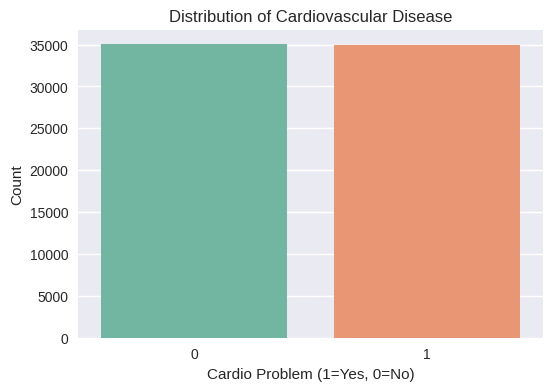

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="cardio", data=df, palette="Set2")
plt.title("Distribution of Cardiovascular Disease")
plt.xlabel("Cardio Problem (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()


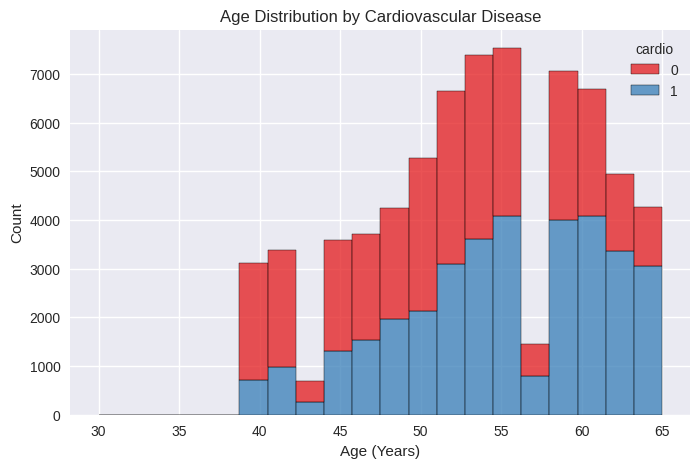

In [93]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age_years", hue="cardio", multiple="stack", bins=20, palette="Set1")
plt.title("Age Distribution by Cardiovascular Disease")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.show()


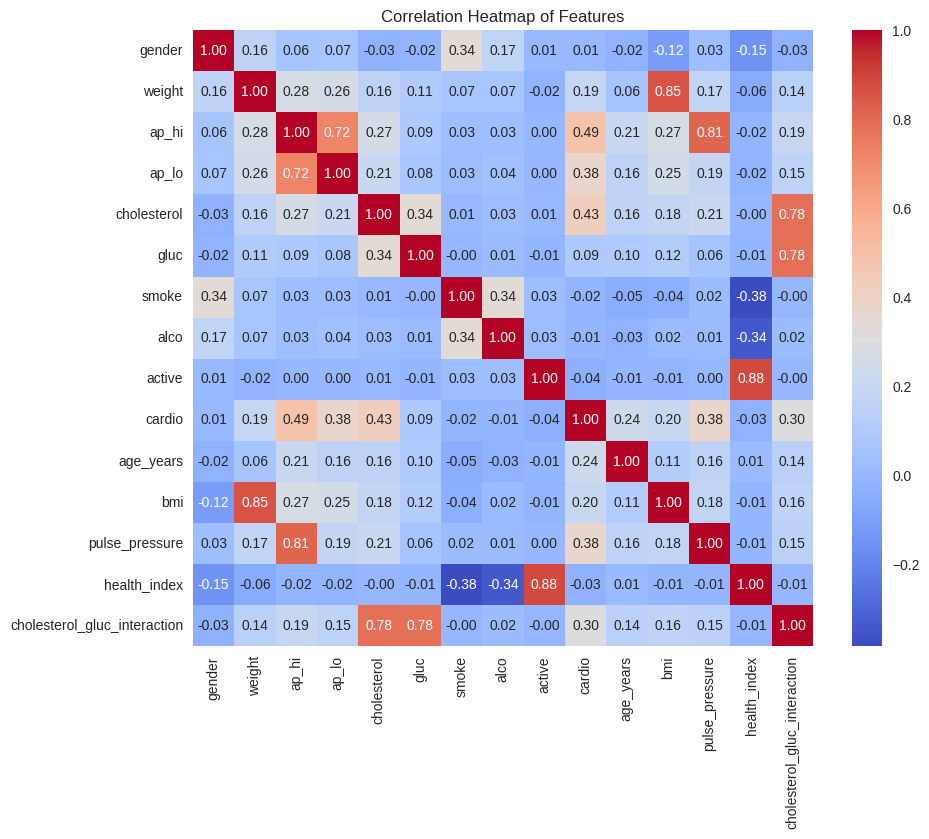

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


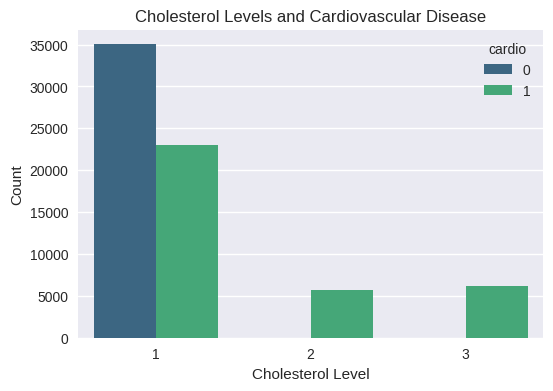

In [96]:
plt.figure(figsize=(6,4))
sns.countplot(x="cholesterol", hue="cardio", data=df, palette="viridis")
plt.title("Cholesterol Levels and Cardiovascular Disease")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.show()


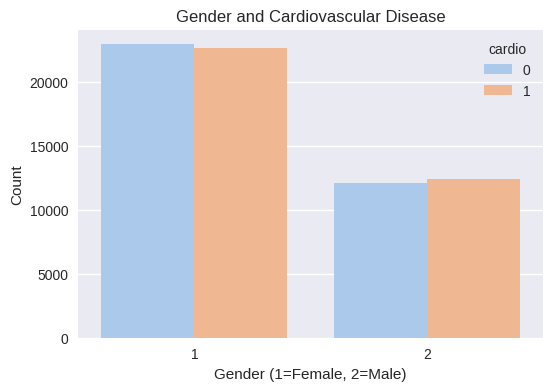

In [98]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="cardio", data=df, palette="pastel")
plt.title("Gender and Cardiovascular Disease")
plt.xlabel("Gender (1=Female, 2=Male)")
plt.ylabel("Count")
plt.show()


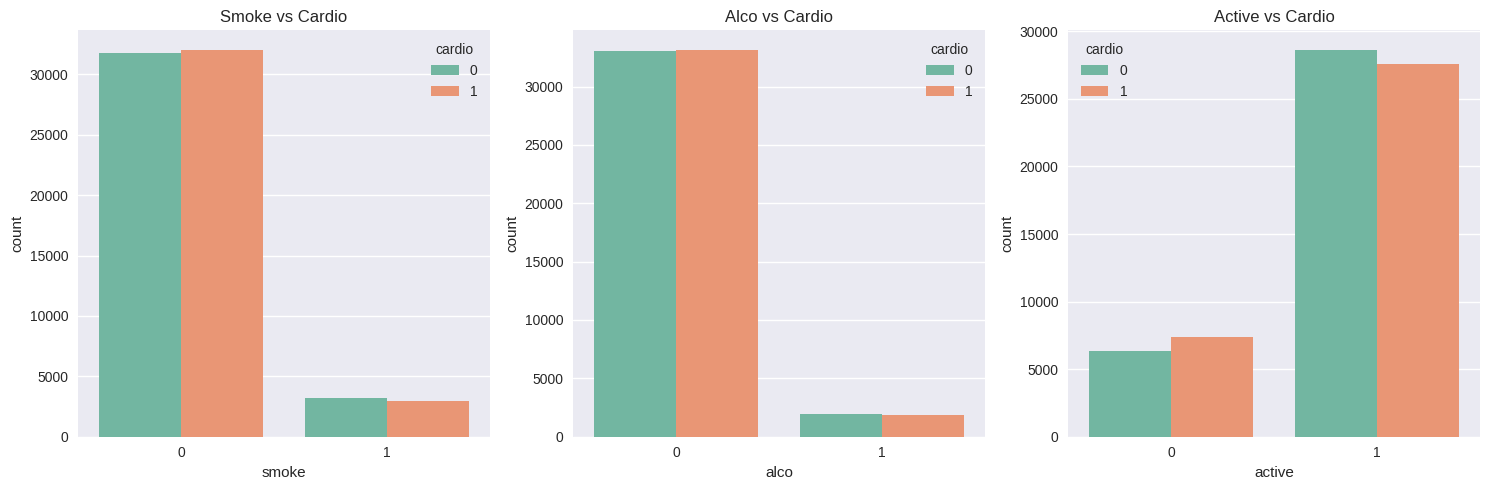

In [99]:
lifestyle = ["smoke", "alco", "active"]
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for i, col in enumerate(lifestyle):
    sns.countplot(x=col, hue="cardio", data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col.capitalize()} vs Cardio")

plt.tight_layout()
plt.show()
